In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('font', family = 'Arial')

In [2]:
# read in results
path = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\final_results.csv"
data = pd.read_csv(path)

## Make dataset for figure comparison here

In [3]:
def subsect(instrument, atmosphere):
    if instrument == "both":
        pass
    else: 
        data.drop(data[data.instrument != instrument].index, inplace = True)
    
    if atmosphere == "all":
        pass
    else:
        data.drop(data[data.atmosphere != atmosphere].index, inplace = True)

In [11]:
data = pd.read_csv(path)
instrument = input("Instrument (LANL/ChemLIBS/both): ")
atmosphere = input("Atmosphere (Mars/Earth/Vacuum/all): ")
subsect(instrument, atmosphere)
display(data)

Instrument (LANL/ChemLIBS/both): ChemLIBS
Atmosphere (Mars/Earth/Vacuum/all): Mars


,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
1,Li,ChemLIBS,Mars,3.614228,1.507842,7.228456,3.015684,21.904414,9.138436,42.664645,28.650199,28.907487,22.569720,0.374922,0.501884
5,MnO,ChemLIBS,Mars,0.139084,0.058025,0.278168,0.116051,0.842934,0.351669,3.039095,0.689864,1.903061,0.859730,0.666209,0.811296
9,Na2O,ChemLIBS,Mars,0.297625,0.124168,0.595251,0.248336,1.803789,0.752534,59.125420,2.900925,0.767067,0.762582,0.610005,0.687698
13,Ni,ChemLIBS,Mars,8.101166,3.379775,16.202332,6.759550,49.097977,20.483486,115.862326,93.105433,92.129247,83.290145,0.440567,0.490512
17,Pb,ChemLIBS,Mars,0.320859,0.133861,0.641718,0.267722,1.944601,0.811280,14.601225,14.284501,19.793583,19.515288,0.151558,0.157097
21,Rb,ChemLIBS,Mars,14.589376,6.086631,29.178751,12.173262,88.420459,36.888673,143.352380,113.573841,60.690793,57.027188,0.269186,0.483607
25,SiO2,ChemLIBS,Mars,3.602151,1.502803,7.204302,3.005607,21.831217,9.107899,3.274463,59.065543,5.598812,5.595842,0.836884,0.839152
29,Sr,ChemLIBS,Mars,69.925923,29.172824,139.851845,58.345648,423.793471,176.804993,547.650541,296.053889,191.041884,97.130928,0.127459,0.485658
33,Zn,ChemLIBS,Mars,3.676700,1.533905,7.353399,3.067810,22.283028,9.296393,87.813762,84.897633,42.960201,42.215436,0.311488,0.355604


#### Split between majors and minors

In [12]:
maj_list = ['MnO', 'Na2O', 'SiO2']
majors = data[data.element.isin(maj_list)].reset_index(drop=True)
minors = data[~data.element.isin(maj_list)].reset_index(drop=True)
display(majors)
display(minors)

,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
0,MnO,ChemLIBS,Mars,0.139084,0.058025,0.278168,0.116051,0.842934,0.351669,3.039095,0.689864,1.903061,0.859730,0.666209,0.811296
1,Na2O,ChemLIBS,Mars,0.297625,0.124168,0.595251,0.248336,1.803789,0.752534,59.125420,2.900925,0.767067,0.762582,0.610005,0.687698
2,SiO2,ChemLIBS,Mars,3.602151,1.502803,7.204302,3.005607,21.831217,9.107899,3.274463,59.065543,5.598812,5.595842,0.836884,0.839152


,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
0,Li,ChemLIBS,Mars,3.614228,1.507842,7.228456,3.015684,21.904414,9.138436,42.664645,28.650199,28.907487,22.569720,0.374922,0.501884
1,Ni,ChemLIBS,Mars,8.101166,3.379775,16.202332,6.759550,49.097977,20.483486,115.862326,93.105433,92.129247,83.290145,0.440567,0.490512
2,Pb,ChemLIBS,Mars,0.320859,0.133861,0.641718,0.267722,1.944601,0.811280,14.601225,14.284501,19.793583,19.515288,0.151558,0.157097
3,Rb,ChemLIBS,Mars,14.589376,6.086631,29.178751,12.173262,88.420459,36.888673,143.352380,113.573841,60.690793,57.027188,0.269186,0.483607
4,Sr,ChemLIBS,Mars,69.925923,29.172824,139.851845,58.345648,423.793471,176.804993,547.650541,296.053889,191.041884,97.130928,0.127459,0.485658
5,Zn,ChemLIBS,Mars,3.676700,1.533905,7.353399,3.067810,22.283028,9.296393,87.813762,84.897633,42.960201,42.215436,0.311488,0.355604


### Compare between Braga and metal background methods

In [13]:
# make plotting function
def braga_metals(lotype):
    #define variables
    braga = lotype + '_Braga'
    metals = lotype + '_metals'
    params = instrument + "_" + atmosphere + "_" + lotype
    
    # define plot stuff
    width = 0.2
    c1 = 'navy'
    c2 = 'goldenrod'
    ysize = 12
    lsize = 14
    tsize = 16
    
    #labels
    majlab = majors.element
    minlab = minors.element
    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    majtk = [x + width/2 for x in majt1]
    mintk = [x + width/2 for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,5),
                                     # make LOD one smaller
                                     gridspec_kw={'width_ratios': [1,2]})
    # majors
    maj1 = maj.bar(majt1, majors[braga], width, label = "Braga", color = c1)
    maj2 = maj.bar(majt2, majors[metals], width, label = "metals", color = c2)
    # minors
    min1 = minor.bar(mint1, minors[braga], width, label = "Braga", color = c1)
    min2 = minor.bar(mint2, minors[metals], width, label = "metals", color = c2)
    
    # formatting
    if lotype == 'R2':
        maj.set_ylabel(lotype, fontsize = tsize)
        plt.subplots_adjust(wspace = 0, hspace =0)
        minor.yaxis.set_ticklabels([])
    else: 
        maj.set_ylabel((lotype + " (wt%)"), fontsize = tsize)
        minor.set_ylabel((lotype + " (ppm)"), fontsize = tsize)
        minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
   
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.legend(handles = [maj1, maj2], fontsize = lsize)
    
    # save image
    path = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\figures\\" + params + '_Braga_metals.eps'
    path1 = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\figures\\" + params + '_Braga_metals.jpeg'
    plt.savefig(path, bbox_inches="tight") # save as .eps
    plt.savefig(path1, bbox_inches="tight") # save as .jpeg
    plt.show()

##### Cai make one to compare among atmospheres

## Make plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


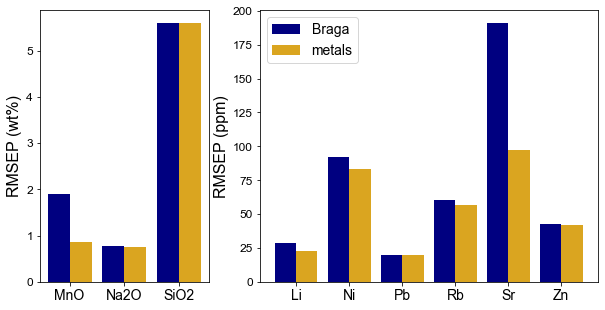

In [15]:
braga_metals("RMSEP")